<h4 style="color:purple">Nasir Hussain 04072013040</h4>

<center>
<h3 style="color:purple">Introduction to Data Mining</h3>
<h4 style="color:purple">Assignment : 2 </h4>
</center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from apyori import apriori
from mlxtend.frequent_patterns import apriori,association_rules

<h3 style="color:purple">Task 1:Load the dataset</h3>

In [2]:
data=pd.read_csv("Car Evaluation.csv")
data.head()

,buying_price,maint_price,doors,persons,lug_boot,safety,carRating
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


<h3 style="color:orange">Data Preprocessing</h3>

In [3]:
data.isnull().sum()

buying_price    0
maint_price     0
doors           0
persons         0
lug_boot        0
safety          0
carRating       0
dtype: int64

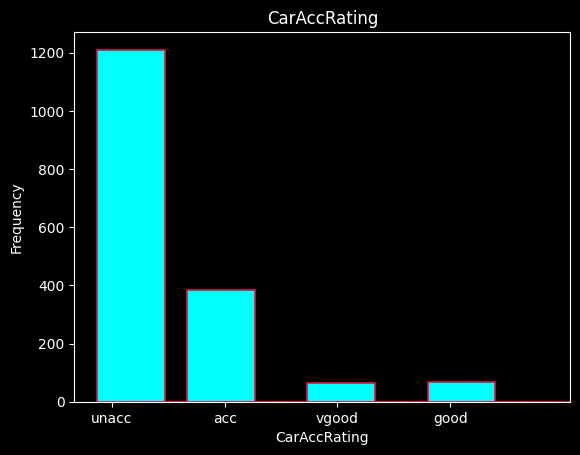

In [4]:
bwidth=0.6
plt.style.use('dark_background')
with plt.style.context('dark_background'):
    bins = np.linspace(0, 4, 16)
    plt.hist(data['carRating'],width=bwidth,color='cyan', edgecolor='crimson', linewidth=1.2, bins=bins,align="left")
    plt.xlabel('CarAccRating')
    plt.ylabel('Frequency')
    plt.title('CarAccRating')
    plt.show()


In [5]:
data1=data[data['carRating']=='acc']
data1a=data[data['carRating']=='unacc']
data1.carRating.unique()

array(['acc'], dtype=object)

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 227 to 1720
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   buying_price  384 non-null    object
 1   maint_price   384 non-null    object
 2   doors         384 non-null    object
 3   persons       384 non-null    object
 4   lug_boot      384 non-null    object
 5   safety        384 non-null    object
 6   carRating     384 non-null    object
dtypes: object(7)
memory usage: 24.0+ KB


In [40]:
data2=data1.drop(columns=['carRating'])
data2a=data1a.drop(columns=['carRating'])
data2.head(1)

,buying_price,maint_price,doors,persons,lug_boot,safety
227,vhigh,med,2,4,small,high


In [38]:
data3=pd.get_dummies(data2)
data3a=pd.get_dummies(data2a)
data3.head(1)

,buying_price_high,buying_price_low,buying_price_med,buying_price_vhigh,maint_price_high,maint_price_low,maint_price_med,maint_price_vhigh,doors_2,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_med
227,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0


<h3 style="color:purple">Task 2:Set a value of support,confidece,lift</h3>

<p style="color:orchid"><b>Support, confidence and lift parameter will be set in apriori() and association_rule()</b></p>

<center><h1 style="color:goldenrod">For CarRating=ACCEPT</h1></center>

<h3 style="color:purple">Task 3:Find frequent Itemset</h3>

<h3 style="color:orange">Apriori Algorithm - mlxtend apriori()</h3>

In [31]:
data3.head()

,buying_price_high,buying_price_low,buying_price_med,buying_price_vhigh,maint_price_high,maint_price_low,maint_price_med,maint_price_vhigh,doors_2,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_med
227,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0
230,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0
232,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
233,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0
239,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0


In [32]:
fItems = apriori(data3, min_support=0.1, use_colnames=True)
fItems = fItems.sort_values(by='support', ascending=False)
fItems

C:\Python310\lib\site-packages\mlxtend-0.22.0-py3.10.egg\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
17,0.531250,(safety_high)
12,0.515625,(persons_4)
13,0.484375,(persons_more)
18,0.468750,(safety_med)
14,0.375000,(lug_boot_big)
...,...,...
80,0.104167,"(lug_boot_big, safety_med, persons_4)"
81,0.104167,"(safety_high, persons_4, lug_boot_small)"
82,0.104167,"(lug_boot_big, safety_med, persons_more)"
24,0.101562,"(buying_price_high, safety_med)"


<h3 style="color:purple">Task 4:Find Strong Association Rule</h3>

<h3 style="color:orange">Association Rule Mining - mlxtend association_rule()</h3>

In [43]:
fItemRules = association_rules(fItems, metric="confidence", min_threshold=0.65)
fItemRules = fItemRules[fItemRules["lift"] > 1.25]
fItemRules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(lug_boot_small),(safety_high),0.273438,0.53125,0.182292,0.666667,1.254902,0.037028,1.40625,0.279570
1,"(persons_4, lug_boot_small)",(safety_high),0.156250,0.53125,0.104167,0.666667,1.254902,0.021159,1.40625,0.240741


In [44]:
strongAsscRules = fItemRules.sort_values(by=['confidence','lift','support'], ascending=[False, False, False])
strongAsscRules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,"(persons_4, lug_boot_small)",(safety_high),0.156250,0.53125,0.104167,0.666667,1.254902,0.021159,1.40625,0.240741
0,(lug_boot_small),(safety_high),0.273438,0.53125,0.182292,0.666667,1.254902,0.037028,1.40625,0.279570


<br>

<center><h1 style="color:goldenrod">For CarRating=UNACCEPT</h1></center>

In [45]:
data3a.head(3)

,buying_price_high,buying_price_low,buying_price_med,buying_price_vhigh,maint_price_high,maint_price_low,maint_price_med,maint_price_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0


In [46]:
unfItems = apriori(data3a, min_support=0.1, use_colnames=True)
unfItemRules = association_rules(unfItems, min_threshold=0.6)
unfItemRules = unfItemRules[unfItemRules["lift"] > 1.25]
unStrongAsscRules = unfItemRules.sort_values(by=['confidence','lift','support'], ascending=[False, False, False])
unStrongAsscRules

C:\Python310\lib\site-packages\mlxtend-0.22.0-py3.10.egg\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(safety_high),(persons_2),0.228926,0.476033,0.158678,0.693141,1.456077,0.049702,1.707516,0.406217
1,(persons_4),(safety_low),0.257851,0.476033,0.158678,0.615385,1.292735,0.035932,1.362314,0.305122


<h1 style="color:goldenrod">CONCLUSION</h1>

<ol>
<li> Car Rating = Accept </li>
 <p>I have found a pattern that [ (persons_4, lug_boot_small)-->(safety_high) ]. This mean that if a car has a capacity of 4 persons and a small luggage boot, it have a high safety rating. And this combination of car features is more likely to have accept rating by car expert</p>
    <br>
 <li> Car Rating = Unaccept </li>
 <p>I have found a pattern that [ (safety_high)-->(persons_2) ]. This mean that if a car has high safety rating but the capacity is of only two person than this pattern is more likely to have unaccept rating by car rating expert.</p>

</ol>

<h4 style="color:red">----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</h4>

<center><h1 style="color:purple">END OF ASSIGNMENT</H1></CENTER>

<h4 style="color:red">----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</h4>